## Exploratory data analysis

In [1]:
import pandas as pd

In [2]:
# Importing data
cars_data = pd.read_csv("datasets/Toyota.csv", index_col = 0, na_values = ["??","????"])
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [3]:
# Creating copy of original data

cars_data2 = cars_data.copy()

### Frequency tables

`pandas.crosstab()`
- To compute a simple cross-tabulation of one, two (or more) factors
- By default computes a frequency table of the factors



In [4]:
pd.crosstab(index = cars_data2['FuelType'], columns = 'count', dropna = True)

col_0,count
FuelType,
CNG,15
Diesel,144
Petrol,1177


### Two-way tables

In [5]:
pd.crosstab(index = cars_data2['Automatic'],
           columns = cars_data2['FuelType'],
           dropna =True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,15,144,1104
1,0,0,73


### Two-way table - joint probability

In [6]:
pd.crosstab(index = cars_data2['Automatic'],
           columns = cars_data2['FuelType'],
           normalize = True,
           dropna =True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011228,0.107784,0.826347
1,0.000000,0.000000,0.054641


### Two-way table - marginal probability
- Marginal probability is the probability of the occurrence of
the single event

In [7]:
pd.crosstab(index = cars_data2['Automatic'],
           columns = cars_data2['FuelType'],
            margins = True,
           normalize = True,
           dropna =True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011228,0.107784,0.826347,0.945359
1,0.000000,0.000000,0.054641,0.054641
All,0.011228,0.107784,0.880988,1.000000


### Two-way table - conditional probability
- Conditional probability is the probability of an event ( A ), given that another event ( B ) has already occurred
- Given the type of gear box, probability of different fuel type

In [8]:
pd.crosstab(index = cars_data2['Automatic'],
           columns = cars_data2['FuelType'],
            margins = True,
           normalize = 'index',
           dropna =True)

FuelType,CNG,Diesel,Petrol
Automatic,,,
0,0.011876,0.114014,0.874109
1,0.000000,0.000000,1.000000
All,0.011228,0.107784,0.880988


In [9]:
# Conditional probability is the probability of an event ( A ), given that another event ( B ) has already occurred

pd.crosstab(index = cars_data2['Automatic'],
           columns = cars_data2['FuelType'],
            margins = True,
           normalize = 'columns',
           dropna =True)

FuelType,CNG,Diesel,Petrol,All
Automatic,,,,
0,1.0,1.0,0.937978,0.945359
1,0.0,0.0,0.062022,0.054641


### Correlation

- Correlation: the strength of association between two variables
- To compute pairwise correlation of columns excluding NA/null values
- Excluding the categorical variables to find the Pearson’s correlation


In [10]:
numerical_data = cars_data2.select_dtypes(exclude =[object])
numerical_data.shape

(1436, 8)

In [11]:
corr_matrix = numerical_data.corr()
corr_matrix

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Price,1.000000,-0.878407,-0.574720,0.309902,0.112041,0.033081,0.165067,0.581198
Age,-0.878407,1.000000,0.512735,-0.157904,-0.099659,0.032573,-0.120706,-0.464299
KM,-0.574720,0.512735,1.000000,-0.335285,-0.093825,-0.081248,0.299993,-0.026271
HP,0.309902,-0.157904,-0.335285,1.000000,0.064749,0.013755,0.053758,0.086737
MetColor,0.112041,-0.099659,-0.093825,0.064749,1.000000,-0.013973,0.029189,0.057142
Automatic,0.033081,0.032573,-0.081248,0.013755,-0.013973,1.000000,-0.069321,0.057249
CC,0.165067,-0.120706,0.299993,0.053758,0.029189,-0.069321,1.000000,0.651450
Weight,0.581198,-0.464299,-0.026271,0.086737,0.057142,0.057249,0.651450,1.000000


## Data Visualization-Part I
 Data visualization allows us to quickly interpret the data and adjust different variables to see their effect.
- matplotlib : to create 2D graphs and plots
- pandas visualization : easy to use interface, built on Matplotlib
- seaborn : provides a high-level interface for drawing attractive and informative statistical graphics
- ggplot : based on R’s ggplot2, uses Grammar of Graphics
- plotly : can create interactive plots

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Importing data
cars_data = pd.read_csv("datasets/Toyota.csv", index_col = 0, na_values = ["??","????"])
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [14]:
cars_data.dropna(axis = 0, inplace =True)

### Scatter plot

The price of the car decreases as age of the car increases

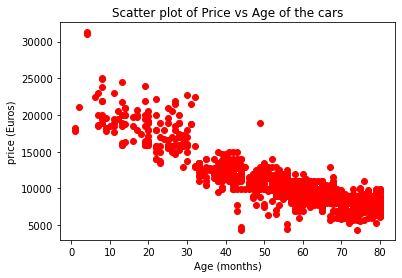

In [16]:
plt.scatter(cars_data['Age'],cars_data['Price'], c = 'red')
plt.title('Scatter plot of Price vs Age of the cars')
plt.xlabel('Age (months)')
plt.ylabel('price (Euros)')
plt.show()

### Histogram

Frequency distribution of kilometre of the cars shows that most of the cars have travelled between 50000 – 100000 km and there are only few cars with more distance travelled

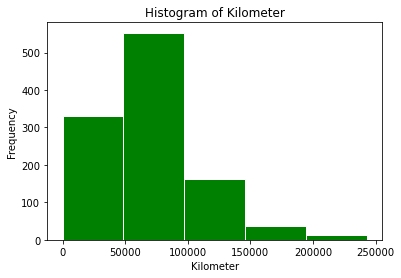

In [17]:
plt.hist(cars_data['KM'],
        color = 'green',
        edgecolor = 'white',
        bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

### Bar Plot

Bar plot of fuel type shows that most of the cars have petrol as
fuel type

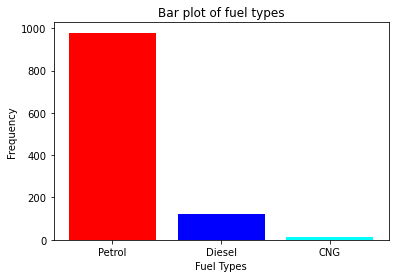

In [21]:
counts = [979, 120, 12]

fuelType = ('Petrol', 'Diesel', 'CNG')

index = np.arange (len (fuelType))


plt.bar(index, counts, color=['red', 'blue', 'cyan'])
plt.title('Bar plot of fuel types')
plt.xlabel('Fuel Types')
plt.ylabel('Frequency')
plt.xticks (index, fuelType, rotation = 0)

plt.show()


## Data Visualization-Part II

In [22]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Price'>

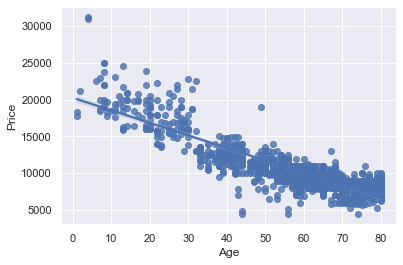

In [24]:
# Scatter plot of Price vs Age with default arguments

sns.set(style = "darkgrid")
sns.regplot(x = cars_data['Age'],y = cars_data['Price'], fit_reg = True )

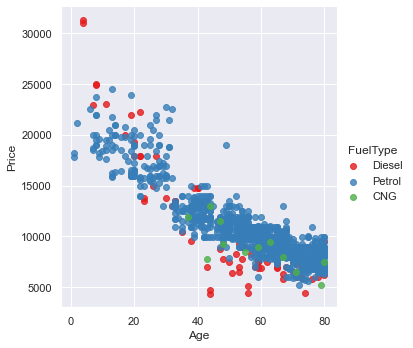

In [25]:
# Scatter plot of Price vs Age by FuelType
# Using hue parameter, including another variable to show the fuel types categories with different colors

sns.lmplot(x = 'Age',y = 'Price', data= cars_data, fit_reg = False, hue = 'FuelType', legend =True, palette = "Set1" )

C:\Users\amilk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

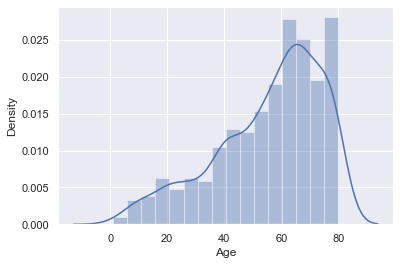

In [26]:
# Histogram with default kernel density estimate

sns.distplot(cars_data['Age'])

<AxesSubplot:xlabel='FuelType', ylabel='count'>

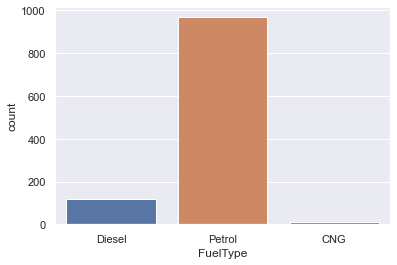

In [28]:
# Frequency distribution of fuel type of the cars
sns.countplot(x = 'FuelType',data = cars_data)

<AxesSubplot:ylabel='Price'>

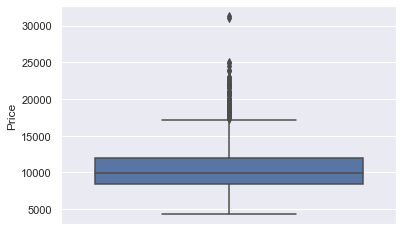

In [30]:
# Box and whiskers plot of Price to visually interpret the five-number summary

sns.boxplot(y = cars_data["Price"])

<AxesSubplot:xlabel='FuelType', ylabel='Price'>

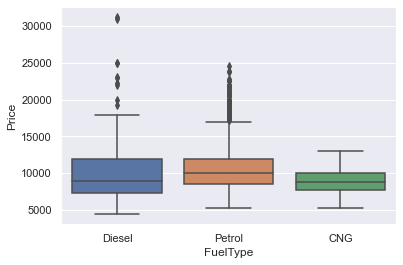

In [31]:
# Box and whiskers plot for numerical vs categorical variable
# Price of the cars for various fuel types

sns.boxplot( x = cars_data["FuelType"],y = cars_data["Price"])

<AxesSubplot:xlabel='FuelType', ylabel='Price'>

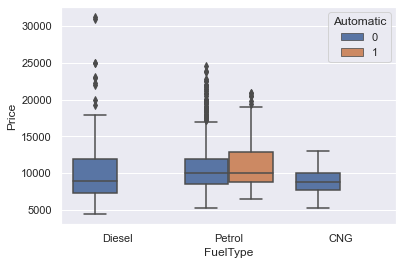

In [32]:
# Grouped box and whiskers plot of Price vs FuelType and Automatic

sns.boxplot( x = cars_data["FuelType"],y = cars_data["Price"], hue = "Automatic", data = cars_data )


C:\Users\amilk\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Count'>

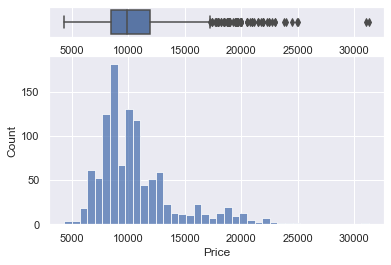

In [43]:
# Let’s plot box-whiskers plot and histogram on the same window
# Split the plotting window into 2 parts

f,(ax_box,ax_hist) = plt.subplots(2,gridspec_kw={"height_ratios":(0.15,0.85)})

# Now, add create two plots
sns.boxplot(cars_data["Price"], ax = ax_box)
sns.histplot(cars_data["Price"], ax = ax_hist, kde = False)


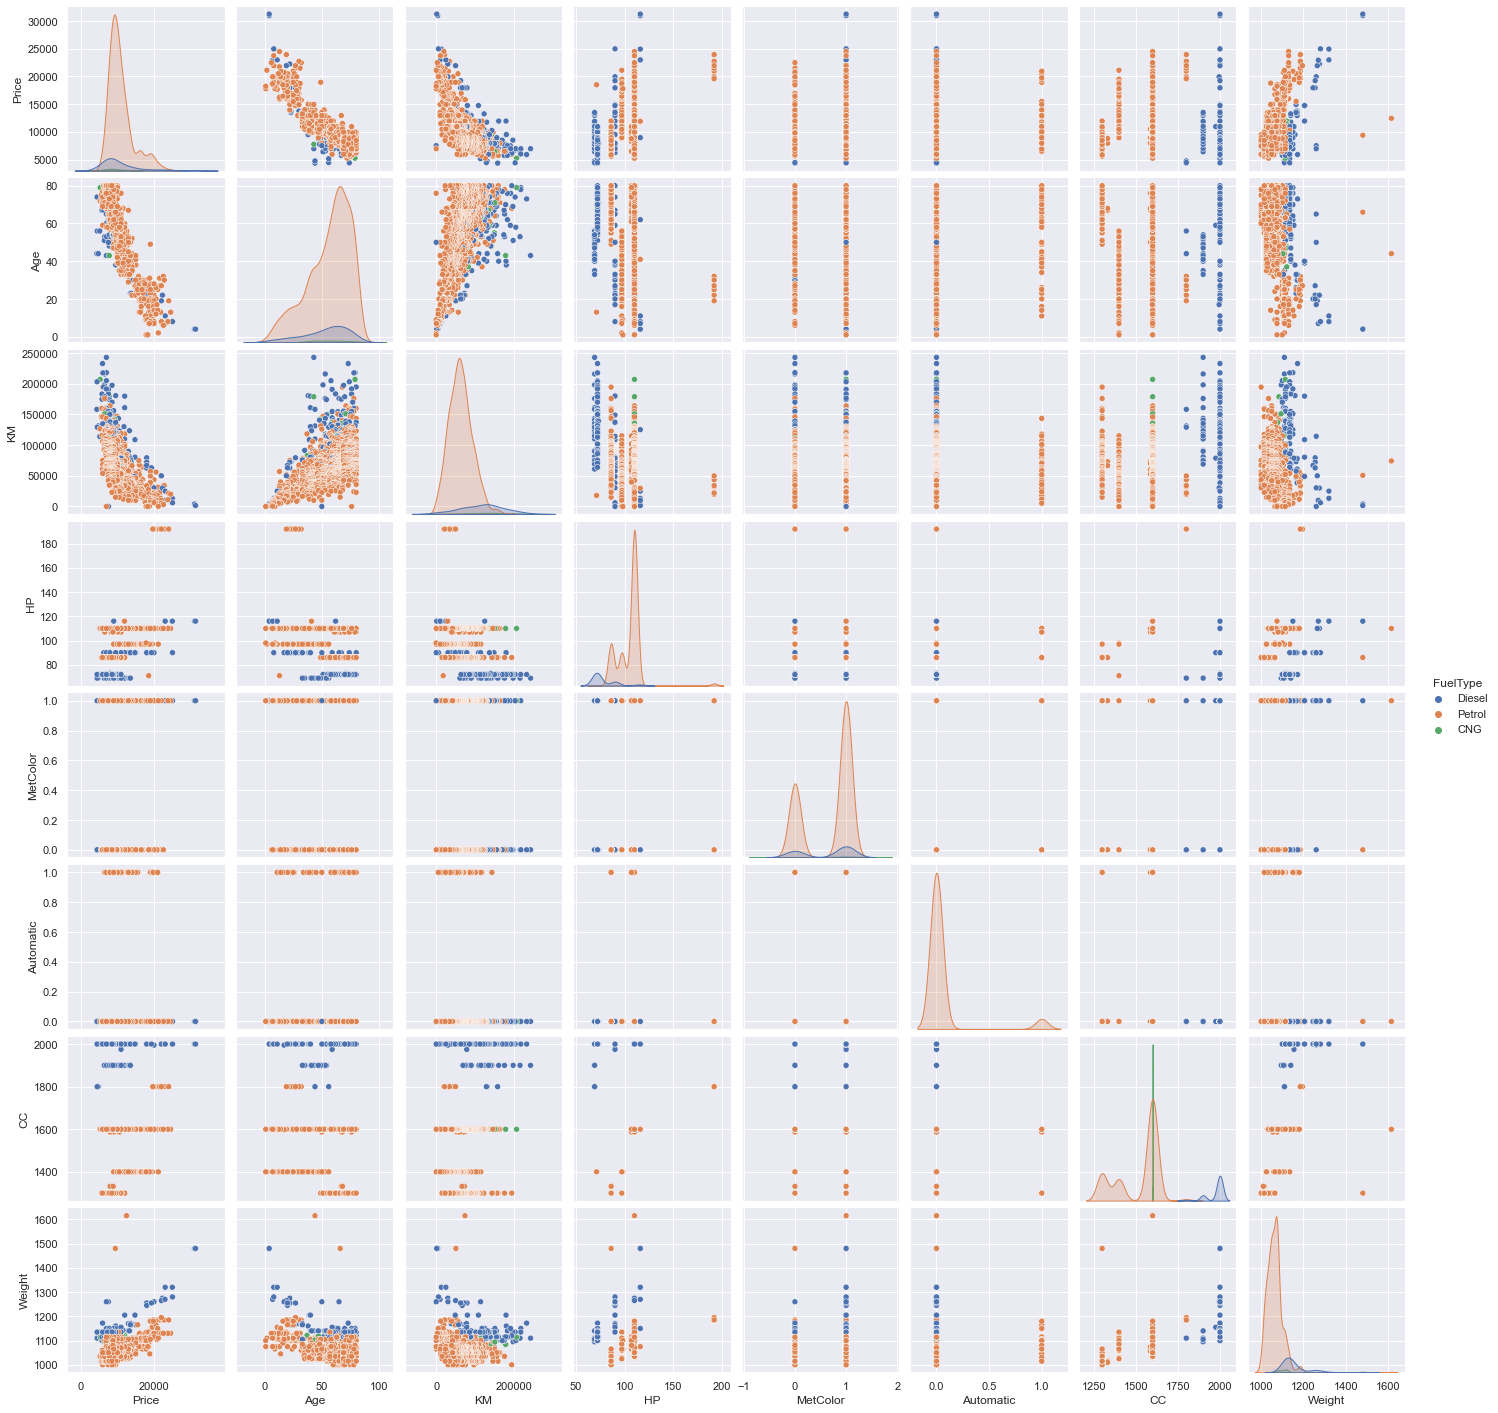

In [39]:
# Pairwise plots is used to plot pairwise relationships in a dataset
# Creates scatterplots for joint relationships and histograms for univariate distributions


sns.pairplot(cars_data, kind="scatter", hue="FuelType")
plt.show()

## Dealing with missing data

In [44]:
# Importing data
cars_data = pd.read_csv("datasets/Toyota.csv", index_col = 0, na_values = ["??","????"])
cars_data.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


In [45]:
# Creating copies of original data

cars_data2 = cars_data.copy()
cars_data3 = cars_data2.copy()

### Identifying missing values
- In Pandas dataframes, missing data is represented by `NaN` (an acronym for Not a Number)
- To check null values in Pandas dataframes, `isnull()` and `isna()` are used
- These functions returns a dataframe of Boolean values which are True for `NaN` values

In [48]:
cars_data2.isna().sum()

Price          0
Age          100
KM            15
FuelType     100
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [51]:
# Subsetting the rows that have one or more missing values

missing = cars_data2[cars_data2.isnull().any(axis=1)]
missing

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
6,16900,27.0,NaN,Diesel,NaN,NaN,0,2000,3,1245
7,18600,30.0,75889.0,NaN,90.0,1.0,0,2000,3,1245
9,12950,23.0,71138.0,Diesel,NaN,NaN,0,1900,3,1105
15,22000,28.0,18739.0,Petrol,NaN,0.0,0,1800,3,1185
...,...,...,...,...,...,...,...,...,...,...
1428,8450,72.0,NaN,Petrol,86.0,NaN,0,1300,3,1015
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015


### Approached to fill the missing values
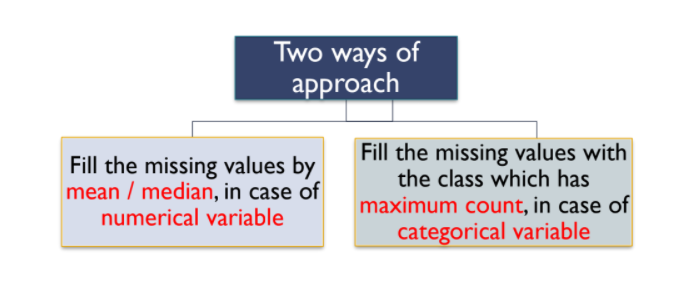

In [52]:
cars_data2.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


### Imputing missing values of ‘Age’

In [56]:
# Calculating the mean value of the Age variable

cars_data2['Age'].mean()

# To fill NA/NaN values using the specified value

cars_data2['Age'].fillna(cars_data2['Age'].mean(), inplace = True)

In [57]:
# Calculating the median value of the KM variable

cars_data2['KM'].median()

# To fill NA/NaN values using the specified value

cars_data2['KM'].fillna(cars_data2['KM'].mean(), inplace = True)

In [58]:
# Calculating the mean value of the HP variable

cars_data2['HP'].mean()

# To fill NA/NaN values using the specified value

cars_data2['HP'].fillna(cars_data2['HP'].mean(), inplace = True)

In [59]:
# Check for missing data after filling values

cars_data2.isnull().sum()

Price          0
Age            0
KM             0
FuelType     100
HP             0
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

In [60]:
# Imputing missing values of ‘FuelType’

cars_data2['FuelType'].value_counts()

Petrol    1177
Diesel     144
CNG         15
Name: FuelType, dtype: int64

In [62]:
# To get the mode value of FuelType

cars_data2["FuelType"].value_counts().index[0]

# To fill NA/NaN values using the specified value

cars_data2["FuelType"].fillna(cars_data2["FuelType"].value_counts().index[0],inplace = True)

In [64]:
# TTo get the mode value of MetColor

cars_data2["MetColor"].value_counts().index[0]

# To fill NA/NaN values using the specified value

cars_data2["MetColor"].fillna(cars_data2["MetColor"].value_counts().index[0],inplace = True)

In [65]:
# Check for missing data after filling values

cars_data2.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

### Imputing missing values using lambda functions

In [67]:
cars_data3 = cars_data3.apply(lambda x:x.fillna(x.mean())\
             if x.dtype =='float' else \
             x.fillna(x.value_counts().index[0]))

In [68]:
# Check for missing data after filling values

cars_data3.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64